# Linear Regression with descending gradient

Y-intercept (b)       : 0.00
Slope (m)             : 2.10
Least square error (RSS): 31.42


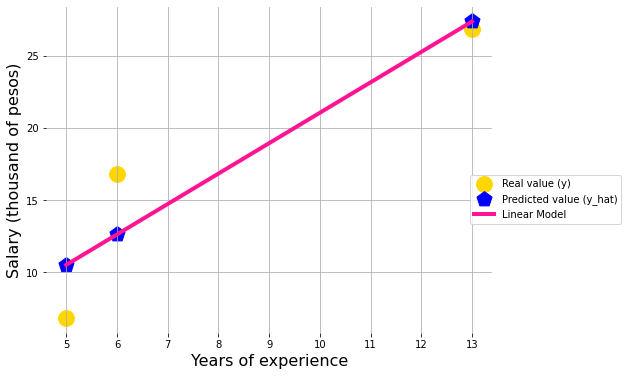

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Independient variable
experience = np.array([[5], [6], [13]])

# variable target
salary = np.array([6.85, 16.83, 26.84])

# Linear model made with the least squares
model = LinearRegression().fit(experience.reshape(3,-1), salary)

#print(experience)
#print(salary)
#print(experience.reshape(3,-1))

# Data visualization
print('Y-intercept (b)       : %0.2f' % model.intercept_)
print('Slope (m)             : %0.2f' % model.coef_[0])
print('Least square error (RSS): %0.2f' % 
     ((salary - model.predict(experience))**2).sum())

plt.figure(figsize=(8,6))

plt.scatter(experience, salary, color='gold', s=250, marker='o', label='Real value (y)')

plt.scatter(experience, model.predict(experience), color='blue', s=250, marker='p', label='Predicted value (y_hat)')

plt.plot(experience, model.predict(experience), linewidth=4, color='deeppink', label='Linear Model')

experience = experience.reshape(3)

plt.ylabel('Salary (thousand of pesos)', size=16)
plt.xlabel('Years of experience', size=16)
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.grid()
plt.box(False)
plt.show()



### Different models with different slopes (m)

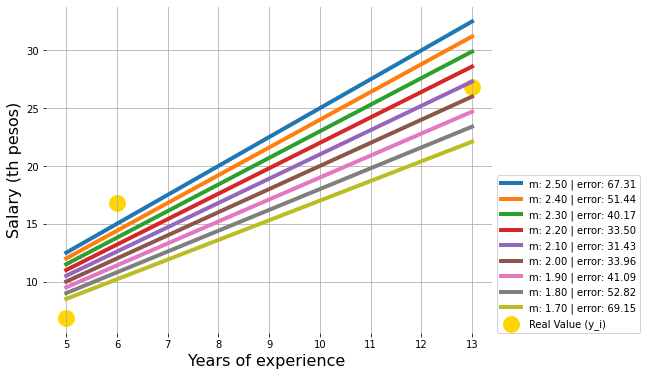

In [2]:
# Creating differents slopes to explore
slopes = np.arange(2.5, 1.6, -0.1)
slopes

# Models visualization
plt.figure(figsize=(8,6))
errors = []
for slope in slopes:
    # Residual Sum of Square (RSS) o Suma de cuadrados de los residuos.
    error = ((slope*experience - salary)**2).sum()
    
    # Model Visualization to slope
    plt.plot(experience, slope*experience, linewidth=4, label='m: %0.2f | error: %0.2f' %(slope, error))
    
    errors = np.append(errors, error)
    
plt.scatter(experience, salary, color='gold', s=250, marker='o', label='Real Value (y_i)')  

plt.ylabel('Salary (th pesos)', size=16)
plt.xlabel('Years of experience ', size=16)
plt.legend(bbox_to_anchor=(1,0.5))
plt.grid()
plt.box(False)
plt.show()


# Errors visualization

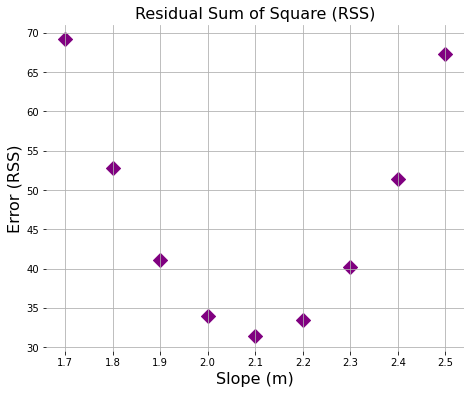

In [3]:
plt.figure(figsize=(7.5,6))
plt.title('Residual Sum of Square (RSS)', size=16)
plt.ylabel('Error (RSS)', size=16)
plt.xlabel('Slope (m)', size=16)
plt.scatter(slopes, errors, color='purple', marker='D', s=99)
plt.grid()
plt.box(False)
plt.show()



# Error function to be minimized

### Residual Sum of Square (RSS)

### yi = salary_i, y_hat = m * experience_i, RSS = sum(y_i - y_hat_i)

In [4]:
# person_1 = (6.85, 5)   person_2 = (16.83, 6)  person_3 = (26.84, 13)
m = sym.Symbol('m')

# Error function
error = (6.85- m*5)**2 + (16.83- m*6)**2 + (26.84- m*13)**2

# Derivade of error function
derivative = sym.diff(error,m)   # @error/@m

for slope in slopes:
    print(derivative, 'Evaluation %0.2f' % derivative.evalf(subs={m: slope}))


460.0*m - 968.3 Evaluation 181.70
460.0*m - 968.3 Evaluation 135.70
460.0*m - 968.3 Evaluation 89.70
460.0*m - 968.3 Evaluation 43.70
460.0*m - 968.3 Evaluation -2.30
460.0*m - 968.3 Evaluation -48.30
460.0*m - 968.3 Evaluation -94.30
460.0*m - 968.3 Evaluation -140.30
460.0*m - 968.3 Evaluation -186.30


# Data Visualization - Derivative of the error function

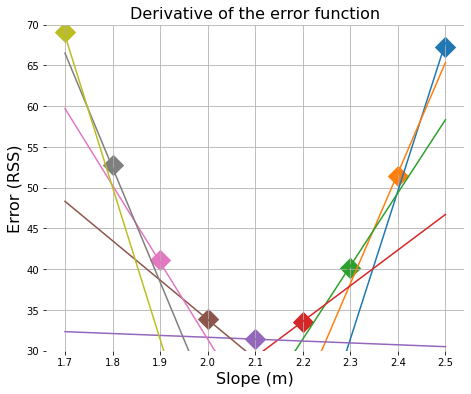

In [5]:
plt.figure(figsize=(7.5,6))

for i in range(0, len(errors),1):
    # Error of the model
    plt.scatter(slopes[i], errors[i],
               label='%0.2f' % derivative.evalf(subs={m: slopes[i]}),
               marker='D', s=200)
    
    # Evaluation of the derivative to an error
    slope = derivative.evalf(subs={m: slopes[i]})
    
    plt.plot(np.array([1.7, 2.5]),
             np.array([1.7, 2.5])*slope + slope*(-2.3 + i*0.05) + errors.min())
    
plt.title( 'Derivative of the error function', size=16)
plt.ylabel('Error (RSS)', size=16)
plt.xlabel('Slope (m)', size=16)
plt.ylim(30,70)
plt.grid()
plt.box(False)
plt.show()


    
    

# Generalize for 2 or more parameters

Y-intercept (b)       : -4.38
Slope (m)             : 2.45
Least square error (RSS): 4.03


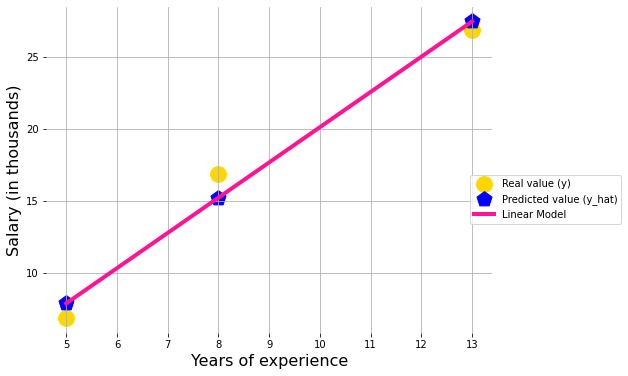

In [6]:
# Data similar but a little change in experience to include the b != 0

# Independient variable
experience = np.array([[5], [8], [13]])

# variable target
salary = np.array([6.85, 16.83, 26.84])

# Linear model made with the least squares
model = LinearRegression().fit(experience.reshape(3,-1), salary)

#print(experience)
#print(salary)
#print(experience.reshape(3,-1))

# Data visualization
print('Y-intercept (b)       : %0.2f' % model.intercept_)
print('Slope (m)             : %0.2f' % model.coef_[0])
print('Least square error (RSS): %0.2f' % 
     ((salary - model.predict(experience))**2).sum())

plt.figure(figsize=(8,6))

plt.scatter(experience, salary, color='gold', s=250, marker='o', label='Real value (y)')

plt.scatter(experience, model.predict(experience), color='blue', s=250, marker='p', label='Predicted value (y_hat)')

plt.plot(experience, model.predict(experience), linewidth=4, color='deeppink', label='Linear Model')

experience = experience.reshape(3)

plt.ylabel('Salary (in thousands)', size=16)
plt.xlabel('Years of experience', size=16)
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.grid()
plt.box(False)
plt.show()

### Error function

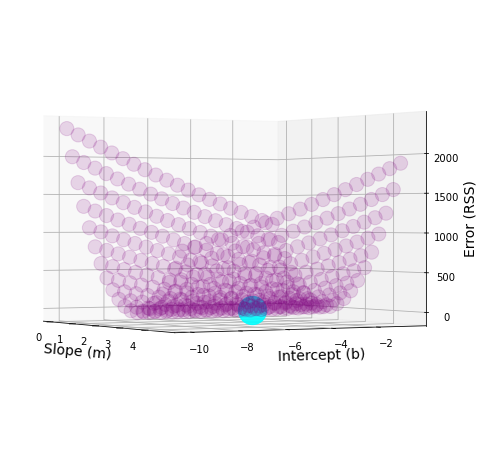

In [26]:
def error_RSS(m, b):
    return (6.85- (m*5+b))**2 + (16.83- (m*8+b))**2 + (26.84- (m*13+b))**2

# Generating the grid (m, b, errors)
points = np.zeros(shape=(400,3))
i = 0
for slope in np.arange(0,5,0.25):
    for intercept in np.arange(-10,0,0.50):
        points[i][0] = slope
        points[i][1] = intercept
        points[i][2] = error_RSS(slope,intercept)
        i += 1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# Global minimum
ax.scatter(2.45, -4.38, 4.03,
          marker='o', c='cyan', s=800, alpha=0.90)


# All points
ax.scatter(points.T[0], points.T[1], points.T[2],
          marker='o', c='purple', s=200, alpha=0.15)

ax.set_xlabel('Slope (m)', size=14)        
ax.set_ylabel('Intercept (b)', size=14)        
ax.set_zlabel('Error (RSS)', size=14)        
ax.view_init(0,-30)                               # to setup the view of the graph
plt.show()





### Partial derivative of the rror function

In [21]:
# person_1 = (6.85, 5)   person_2 = (16.83, 6)  person_3 = (26.84, 13)
m, b = sym.symbols("m b")

# Error function
error = (6.85- (m*5+b))**2 + (16.83- (m*8+b))**2 + (26.84- (m*13+b))**2

# Derivade of error function
derivative_m = sym.diff(error,m)   # @error/@m
derivative_b = sym.diff(error,b)   # @error/@b

print(derivative_m)
print(derivative_b)


# for slope in slopes:
#     print(derivative, 'Evaluation %0.2f' % derivative.evalf(subs={m: slope}))


52.0*b + 516.0*m - 1035.62
6.0*b + 52.0*m - 101.04


### Pseudocode of Descending Gradient

1. Max_iterations = 10000
2. iteration = 0
3. rate_of_learn = 0.001
4. Init random parameters (m,b)
5. While (iteration < Max_iterations) do:
6.      calculate gradients in the actual position
7.      update parameters and the rate_of_learn
8.      iteration += 1


### Implementation of the Descending Gradient

In [25]:
max_iter = 10000
ratio_of_learn = 0.001

# Init random parameters (m,b)
slope = 0
intercept = -10

errors = np.zeros(shape=(10000,3))

for i in range(max_iter):
    # to estimate of gradients
    gradients = [derivative_m.evalf(subs={m: slope, b: intercept}),
                 derivative_b.evalf(subs={m: slope, b: intercept})]
    
    # to update parameters
    slope = slope - ratio_of_learn*gradients[0]
    intercept = intercept - ratio_of_learn*gradients[1]
    
    # to save the error
    errors[i][0] = slope
    errors[i][1] = intercept
    errors[i][2] = error_RSS(slope, intercept)
    
# Values estimated through the least squares method
# m = 2.44, b= -4.38

print('Derivative of Slope (m)             : %0.4f' % gradients[0])
print('Derivative of intercept (b)       : %0.4f' % gradients[1])
print('m = %0.2f' % slope, 'b = %0.2f' % intercept)



Derivative of Slope (m)             : 0.0002
Derivative of intercept (b)       : -0.0022
m = 2.45 b = -4.38


The derivative is almost zero, then we found a minimum.

### Error visualization

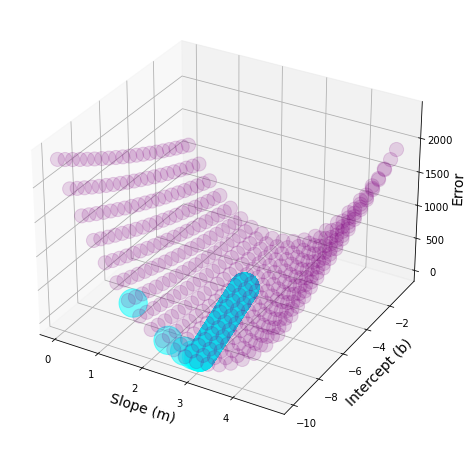

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# Tracking to error
ax.scatter(errors.T[0], errors.T[1], errors.T[2],
          marker='o', c='cyan', s=800, alpha=0.5)

# All the points
ax.scatter(points.T[0], points.T[1], points.T[2],
          marker='o', c='purple', s=200, alpha=0.15)

ax.set_xlabel('Slope (m)', size=14)
ax.set_ylabel('Intercept (b)', size=14)
ax.set_zlabel('Error', size=14)
plt.show()

